In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import gffutils
import json

In [2]:
main_path = Path('..')
data_path = main_path / 'Data'
ref_path = data_path / 'GRCh38genome'
preprocessing_path = data_path / 'Preprocessing_LNDR_HNDR'
intersect_path = data_path / 'intersect_regions'
transcriptome_path = data_path / 'transcriptome'

In [13]:
with open(ref_path / 'transcript_to_gene.json', 'r') as file:
    transcript_to_gene = json.load(file)

#### Read trancriptome data

In [54]:
df_expression = pd.read_csv(transcriptome_path / 'GSM2343345_ENCFF773JNC_gene_quantifications_GRCh38.tsv', sep='\t')

In [55]:
df_expression.head()

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,FPKM_ci_lower_bound,FPKM_ci_upper_bound
0,10904,10904,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12954,12954,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12956,12956,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12958,12958,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12960,12960,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df = df_expression.loc[df_expression['gene_id'].str.startswith('ENSG'), ['gene_id', 'TPM']]

In [57]:
df.head()

,gene_id,TPM
649,ENSG00000000003.14,60.14
650,ENSG00000000005.5,0.00
651,ENSG00000000419.12,73.11
652,ENSG00000000457.13,2.24
653,ENSG00000000460.16,11.60


In [58]:
df['gene_id_mod'] = df['gene_id'].str.split('.').str[0]
df.head()

,gene_id,TPM,gene_id_mod
649,ENSG00000000003.14,60.14,ENSG00000000003
650,ENSG00000000005.5,0.00,ENSG00000000005
651,ENSG00000000419.12,73.11,ENSG00000000419
652,ENSG00000000457.13,2.24,ENSG00000000457
653,ENSG00000000460.16,11.60,ENSG00000000460


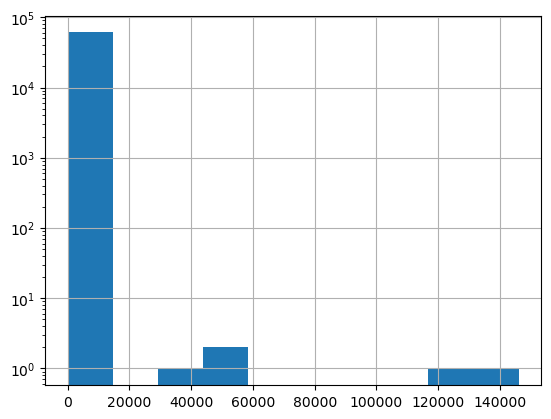

In [59]:
df['TPM'].hist()
plt.yscale('log')

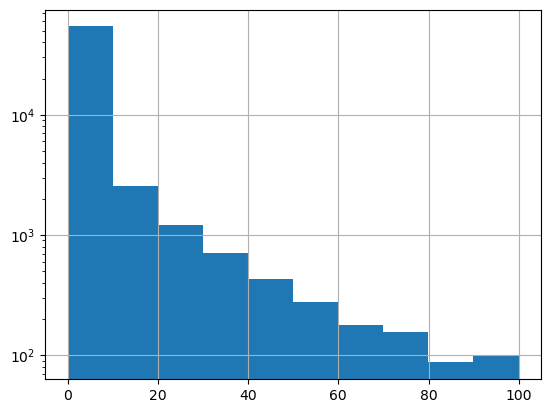

In [60]:
df.loc[df['TPM'] < 100, 'TPM'].hist()
plt.yscale('log')

In [61]:
df['TPM'].quantile(0.20), df['TPM'].quantile(0.80), df['TPM'].quantile(0.85)

(0.0, 1.24, 4.6)

In [62]:
df.shape

(60725, 3)

In [51]:
genes = []
for gene_id in transcript_to_gene.values():
    genes.append(gene_id.split('.')[0])

c = 0
missing = []
for gene_id in df['gene_id_mod']:
    if gene_id in genes:
        c += 1
    else:
        missing.append(gene_id)
        
print(f'genes from expression data present in map {c}')
print(f"genes missing {df['gene_id_mod'].shape[0] - c} | {len(missing)}")

genes from expression data present in map 55702
genes missing 5023 | 5023


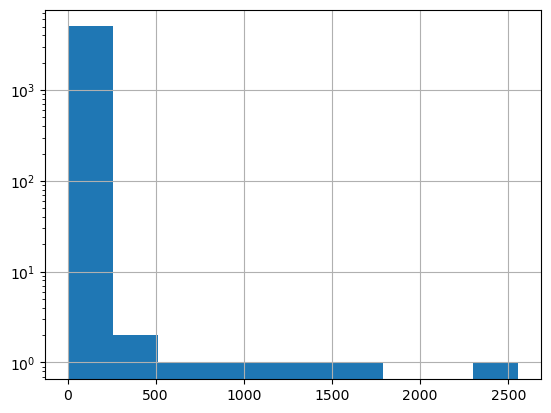

In [52]:
df.loc[df['gene_id_mod'].isin(missing), 'TPM'].hist()
plt.yscale('log')

In [38]:
transcript_to_gene

{'ENST00000832828.1': 'ENSG00000290825.2',
 'ENST00000450305.2': 'ENSG00000223972.6',
 'ENST00000831158.1': 'ENSG00000310526.1',
 'ENST00000831210.1': 'ENSG00000310526.1',
 'ENST00000831361.1': 'ENSG00000310526.1',
 'ENST00000831289.1': 'ENSG00000310526.1',
 'ENST00000831499.1': 'ENSG00000310526.1',
 'ENST00000831463.1': 'ENSG00000310526.1',
 'ENST00000831292.1': 'ENSG00000310526.1',
 'ENST00000831355.1': 'ENSG00000310526.1',
 'ENST00000831487.1': 'ENSG00000310526.1',
 'ENST00000831582.1': 'ENSG00000310526.1',
 'ENST00000488147.2': 'ENSG00000227232.6',
 'ENST00000619216.1': 'ENSG00000278267.1',
 'ENST00000834619.1': 'ENSG00000243485.6',
 'ENST00000473358.1': 'ENSG00000243485.6',
 'ENST00000469289.1': 'ENSG00000243485.6',
 'ENST00000607096.1': 'ENSG00000284332.1',
 'ENST00000834251.1': 'ENSG00000237613.3',
 'ENST00000833573.1': 'ENSG00000308361.1',
 'ENST00000832531.1': 'ENSG00000290826.2',
 'ENST00000642116.1': 'ENSG00000290826.2',
 'ENST00000606857.1': 'ENSG00000268020.3',
 'ENST00000

In [53]:
# df[['gene_id_mod', 'TPM']].to_csv(transcriptome_path / 'GSM2343347.tsv', sep='\t', header=['gene_id', 'expression'], index=False)